# EDA MINI_Project

1.	Import the necessary libraries and read the data.
Data Preprocessing:
2.  Drop any columns that you deem unecessary for analysis.
3.  The following columns need to be converted for further analysis:
4.  Check for missing values and do a mean imputation where necessary.
read the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [3]:
# Read the data.
fb=pd.read_csv('fifa.csv')
fb

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Composure Marking StandingTackle  SlidingTackle  GKDiving  \
0      ...      96.0    33.0           28.0           26.0       6.0   
1      ...      95.0    28.0           31.0           23.0       7.0   
2      ...      94.0    27.0           24.0           33.0       9.0   
3      ...      68.0    15.0           21.0           13.0      90.0   
4      ...      88.0    68.0           58.0           51.0      15.0   
...    ...       ...     ...            ...            ...       ...   
18202  ...      45.0    40.0           48.0           47.0      10.0   
18203  ...      42.0    22.0           15.0           19.0      10.0   
18204  ...      41.0    32.0           13.0           11.0       6.0   
18205  ...      46.0    20.0           25.0           27.0      14.0   
18206  ...      43.0    40.0           43.0           50.0      10.0   

       GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
0          

In [4]:
#2.  Drop any columns that you deem unecessary for analysis.
length=len(fb)
length

18207

In [5]:
fb.isnull().sum()/length*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [6]:
fb.drop('Loaned From',axis=1,inplace=True)

In [7]:
# ['Value'] : Convert to Float after getting rid of currency symbol and suffix.
fb['Value']=fb['Value'].str.lstrip('€')
fb['Value'] = fb['Value'].replace({'K': '1e3', 'M': '1e6'}, regex=True).map(pd.eval).astype(float)
fb['Value'].describe()

count    1.820700e+04
mean     1.298986e+07
std      4.268678e+07
min      0.000000e+00
25%      1.810000e+06
50%      3.910000e+06
75%      7.001000e+06
max      1.021000e+09
Name: Value, dtype: float64

In [8]:
fb.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve     

In [9]:
# ['Wage'] : Convert to Float after getting rid of currency symbol and suffix.

fb['Wage']=fb['Wage'].str.lstrip('€')
fb['Wage'] = fb['Wage'].replace({'K': '1e3', 'M': '1e6'}, regex=True).map(pd.eval).astype(float)
fb['Wage'].describe()

count    1.820700e+04
mean     9.829988e+04
std      2.199988e+05
min      0.000000e+00
25%      1.100000e+04
50%      3.100000e+04
75%      9.100000e+04
max      5.651000e+06
Name: Wage, dtype: float64

In [10]:
#['Joined']: Convert to int with only year.


print(fb['Joined'].isnull().sum()/len(fb)*100)


8.529686384357664


In [11]:
fb['Joined']=fb['Joined'].str[-4:]
fb['Joined'].fillna(fb['Joined'].median(),inplace=True)

In [12]:
fb['Joined'].isnull().sum()

0

In [13]:
fb['Joined']=fb['Joined'].astype('int64')
fb['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int64

In [14]:
#['Contract Valid Until'] : Convert to datetime type , showing only the year .


fb.dropna(subset=['Contract Valid Until'],inplace=True)
fb['Contract Valid Until']=fb['Contract Valid Until'].astype('datetime64[ns]')
fb['Contract Valid Until']=fb['Contract Valid Until'].dt.year
fb['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 17918, dtype: int64

In [15]:
# ['Height'] : Convert to Float with decimal points

fb.dropna(subset=['Height'],inplace=True)
fb['Height']=fb['Height'].replace("'",".",regex=True)
fb['Height']=fb['Height'].astype('float64')
fb['Height'].describe()

count    17918.000000
mean         5.796987
std          0.448446
min          5.100000
25%          5.110000
50%          5.900000
75%          6.100000
max          6.900000
Name: Height, dtype: float64

In [16]:
#['Weight']  :  Remove the suffix and convert to float.

fb.dropna(subset=['Weight'],inplace=True)
fb['Weight']=fb['Weight'].str.rstrip('lbs')
fb['Weight']=fb['Weight'].astype('float64')
fb['Weight'].describe()

count    17918.000000
mean       165.968858
std         15.604084
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

In [17]:
#['Release Clause'] : Convert to Float after getting rid of currency symbol and suffix.

fb['Release Clause'].isnull().sum()/len(fb)*100

7.115749525616698

In [18]:
fb.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Jersey Number                  0
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve     

In [19]:
fb['Release Clause']=fb['Release Clause'].str.lstrip('€')
fb['Release Clause']=fb['Release Clause'].str.rstrip('MK')
fb['Release Clause']=fb['Release Clause'].astype('float64')

In [20]:
fb['Release Clause'].skew()

1.0695513335571178

In [21]:
fb['Release Clause']=fb['Release Clause'].fillna(fb['Release Clause'].median())
fb['Release Clause'].describe()

count    17918.000000
mean       213.371961
std        293.342376
min          1.000000
25%          2.800000
50%         19.800000
75%        396.000000
max        999.000000
Name: Release Clause, dtype: float64

In [22]:
fb.isnull().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallContro

## EXPLORATORY ANALYSIS 

1) Plot the distribution of Overall rating for all players.

In [26]:
plt.figure(figsize=(13,5))
sns.boxplot(fb['Overall'])
plt.axvline(fb['Overall'].mean(),color='g')
plt.show()
# black line indicates median
# green line indicates mean point

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [27]:
skew=fb['Overall'].skew()
print('Skewness = ',skew)

Skewness =  0.06752948962510008


The distribution of the column 'overall' rating is of symmetric type.
Most of the players are in the rating range of 62 -71 .

2) Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


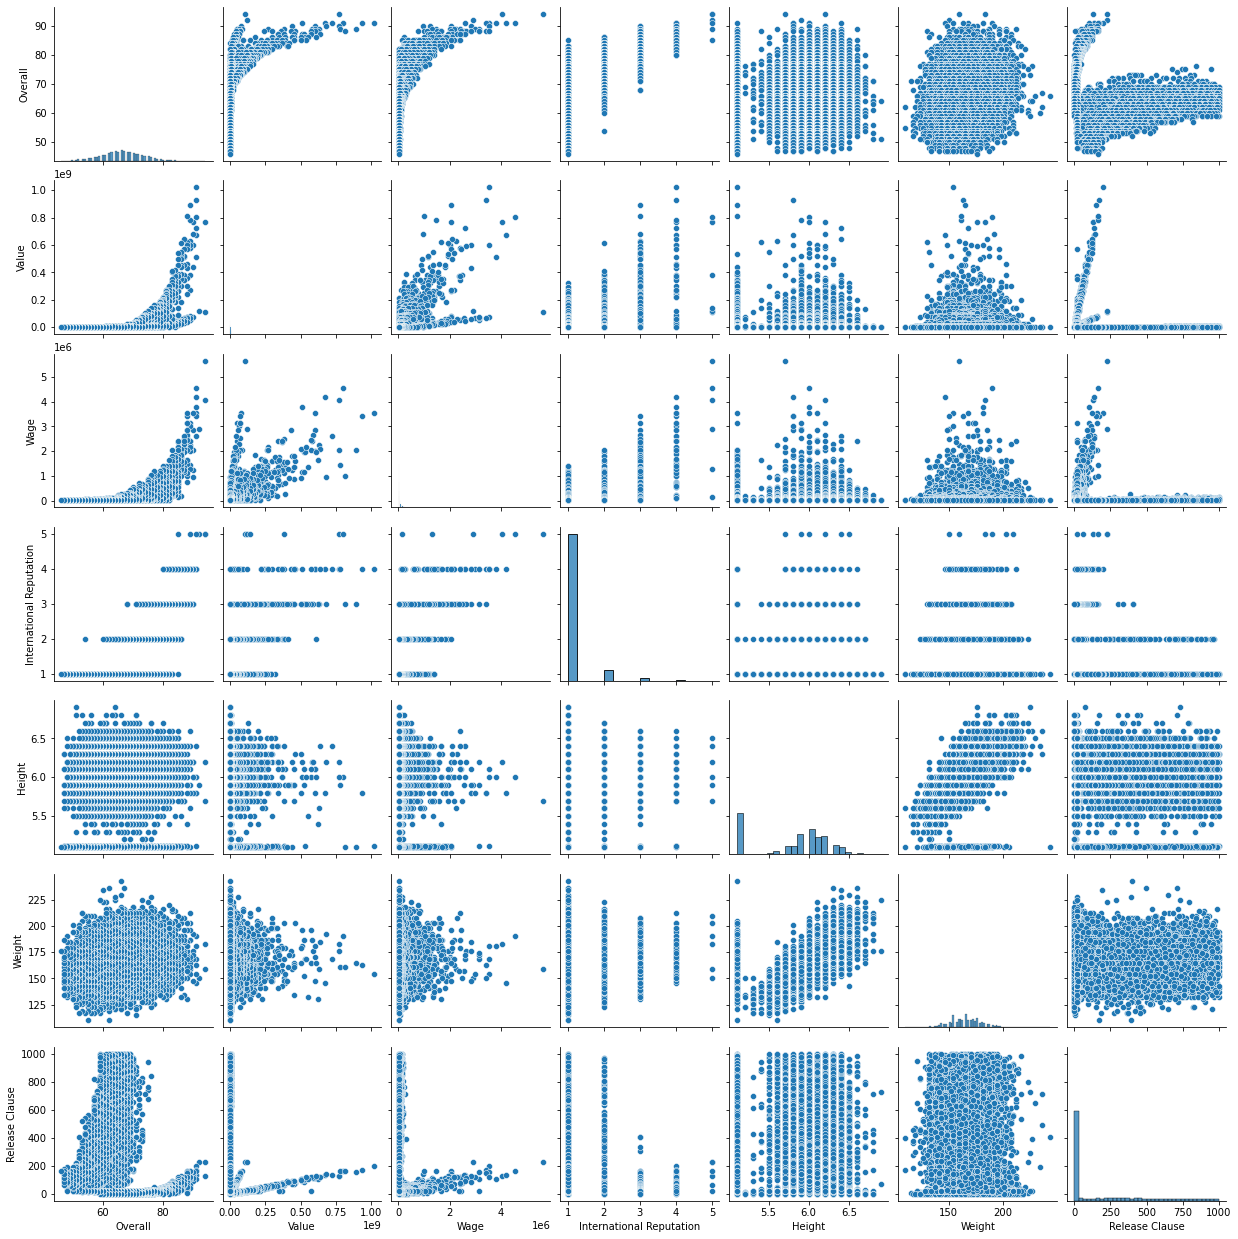

In [28]:
sns.pairplot(fb[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])
plt.show()

3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [38]:
fb[(fb['Overall'].sort_values()) & (fb['Contract Valid Until'] ==2020 )].head(20)


ID          Name  Age  \
3    193080        De Gea   27   
5    183277     E. Hazard   27   
6    177003     L. Modrić   32   
8    155862  Sergio Ramos   32   
21   179813     E. Cavani   31   
24   138956  G. Chiellini   33   
46   193041      K. Navas   31   
49   189332    Jordi Alba   29   
50   175943    D. Mertens   31   
52   171877     M. Hamšík   30   
80   216594      N. Fekir   24   
90   189513        Parejo   29   
98   180930      E. Džeko   32   
102  171919         Naldo   35   
103  170890    B. Matuidi   31   
104  168609       Miranda   33   
167  212188     T. Werner   22   
179  206113     S. Gnabry   22   
181  204639      S. Savić   27   
201  192593    D. Subašić   33   

                                              Photo         Nationality  \
3    https://cdn.sofifa.org/players/4/19/193080.png               Spain   
5    https://cdn.sofifa.org/players/4/19/183277.png             Belgium   
6    https://cdn.sofifa.org/players/4/19/177003.png             Croatia   
8    https://cdn.sofifa.org/players/4/19/155862.png               Spain   
21   https://cdn.sofifa.org/players/4/19/179813.png             Uruguay   
24   https://cdn.sofifa.org/players/4/19/138956.png               Italy   
46   https://cdn.sofifa.org/players/4/19/193041.png          Costa Rica   
49   https://cdn.sofifa.org/players/4/19/189332.png               Spain   
50   https://cdn.sofifa.org/players/4/19/175943.png             Belgium   
52   https://cdn.sofifa.org/players/4/19/171877.png            Slovakia   
80   https://cdn.sofifa.org/players/4/19/216594.png              France   
90   https://cdn.sofifa.org/players/4/19/189513.png               Spain   
98   https://cdn.sofifa.org/players/4/19/180930.png  Bosnia Herzegovina   
102  https://cdn.sofifa.org/players/4/19/171919.png              Brazil   
103  https://cdn.sofifa.org/players/4/19/170890.png              France   
104  https://cdn.sofifa.org/players/4/19/168609.png              Brazil   
167  https://cdn.sofifa.org/players/4/19/212188.png             Germany   
179  https://cdn.sofifa.org/players/4/19/206113.png             Germany   
181  https://cdn.sofifa.org/players/4/19/204639.png          Montenegro   
201  https://cdn.sofifa.org/players/4/19/192593.png             Croatia   

                                    Flag  Overall  Potential  \
3    https://cdn.sofifa.org/flags/45.png       91         93   
5     https://cdn.sofifa.org/flags/7.png       91         91   
6    https://cdn.sofifa.org/flags/10.png       91         91   
8    https://cdn.sofifa.org/flags/45.png       91         91   
21   https://cdn.sofifa.org/flags/60.png       89         89   
24   https://cdn.sofifa.org/flags/27.png       89         89   
46   https://cdn.sofifa.org/flags/72.png       87         87   
49   https://cdn.sofifa.org/flags/45.png       87         87   
50    https://cdn.sofifa.org/flags/7.png       87         87   
52   https://cdn.sofifa.org/flags/43.png       87         87   
80   https://cdn.sofifa.org/flags/18.png       85         89   
90   https://cdn.sofifa.org/flags/45.png       85         85   
98    https://cdn.sofifa.org/flags/8.png       85         85   
102  https://cdn.sofifa.org/flags/54.png       85         85   
103  https://cdn.sofifa.org/flags/18.png       85         85   
104  https://cdn.sofifa.org/flags/54.png       85         85   
167  https://cdn.sofifa.org/flags/21.png       83         87   
179  https://cdn.sofifa.org/flags/21.png       83         88   
181  https://cdn.sofifa.org/flags/15.png       83         86   
201  https://cdn.sofifa.org/flags/10.png       83         83   

                    Club                                        Club Logo  \
3      Manchester United      https://cdn.sofifa.org/teams/2/light/11.png   
5                Chelsea       https://cdn.sofifa.org/teams/2/light/5.png   
6            Real Madrid     https://cdn.sofifa.org/teams/2/light/243.png   
8            Real Madrid     https://cdn.sofifa.org/teams/2/light

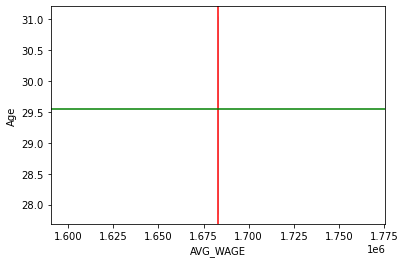

In [106]:
sns.lineplot(data=fb,x=FB_20['AVG_WAGE'],y='Age')
plt.axvline(x=1683000,color='red')
plt.axhline(y=29.55,color='green')

In [42]:
# a) What would the average wage for this set of players be?
FB_20['AVG_WAGE'] = FB_20['Wage'].mean()


In [48]:
print("The average wage for this set of players is -",FB_20['Wage'].mean())

The average wage for this set of players is - 1683000.0


In [51]:
# b)What is the average age?
FB_20['AVG_AGE']=FB_20['Age'].mean()
print("The average age  - ",FB_20['Age'].mean())

The average age  -  29.55


In [52]:
# c)Is there a correlation between the Overall rating and Value for these players?
FB_20[['Overall','Value']].corr()

Overall     Value
Overall  1.000000  0.751691
Value    0.751691  1.000000

4.Generate tables containing the top 5 players by Overall rating for each unique position.

In [53]:
fb['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [54]:
#Top five for RF Position
fb1 = fb[(fb['Overall']) & (fb['Position'] == 'RF')].head()
fb1

ID                Name  Age  \
50    175943          D. Mertens   31   
1774  201313            C. Ciano   28   
6108  224385           H. Yamada   29   
6161  209039  D. Moberg Karlsson   24   
6430  213717          P. Forsell   27   

                                               Photo Nationality  \
50    https://cdn.sofifa.org/players/4/19/175943.png     Belgium   
1774  https://cdn.sofifa.org/players/4/19/201313.png       Italy   
6108  https://cdn.sofifa.org/players/4/19/224385.png       Japan   
6161  https://cdn.sofifa.org/players/4/19/209039.png      Sweden   
6430  https://cdn.sofifa.org/players/4/19/213717.png     Finland   

                                      Flag  Overall  Potential  \
50      https://cdn.sofifa.org/flags/7.png       87         87   
1774   https://cdn.sofifa.org/flags/27.png       75         75   
6108  https://cdn.sofifa.org/flags/163.png       69         69   
6161   https://cdn.sofifa.org/flags/46.png       69         75   
6430   https://cdn.sofifa.org/flags/17.png       69         69   

                Club                                        Club Logo  ...  \
50            Napoli      https://cdn.sofifa.org/teams/2/light/48.png  ...   
1774       Frosinone  https://cdn.sofifa.org/teams/2/light/111657.png  ...   
6108    Júbilo Iwata  https://cdn.sofifa.org/teams/2/light/101144.png  ...   
6161  IFK Norrköping     https://cdn.sofifa.org/teams/2/light/702.png  ...   
6430   Miedź Legnica  https://cdn.sofifa.org/teams/2/light/112505.png  ...   

      Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
50         81.0     25.0           40.0           40.0       7.0        10.0   
1774       74.0     24.0           23.0           20.0       9.0        12.0   
6108       64.0     51.0           48.0           46.0       9.0        15.0   
6161       50.0     38.0           18.0           15.0      10.0        14.0   
6430       63.0     46.0           54.0           52.0      11.0        12.0   

     GKKicking GKPositioning GKReflexes  Release Clause  
50         8.0          10.0        4.0            76.5  
1774       9.0           9.0        7.0            11.7  
6108       9.0           7.0       16.0             1.3  
6161       8.0           8.0       10.0             2.1  
6430      15.0          11.0       14.0             1.5  

[5 rows x 59 columns]

In [56]:
#Top five for ST Position
fb2= fb[(fb['Overall']) & (fb['Position'] == 'ST')].head()
fb2

ID         Name  Age                                           Photo  \
16  202126      H. Kane   24  https://cdn.sofifa.org/players/4/19/202126.png   
23  153079    S. Agüero   30  https://cdn.sofifa.org/players/4/19/153079.png   
43  201399    M. Icardi   25  https://cdn.sofifa.org/players/4/19/201399.png   
47  192505    R. Lukaku   25  https://cdn.sofifa.org/players/4/19/192505.png   
48  192387  C. Immobile   28  https://cdn.sofifa.org/players/4/19/192387.png   

   Nationality                                 Flag  Overall  Potential  \
16     England  https://cdn.sofifa.org/flags/14.png       89         91   
23   Argentina  https://cdn.sofifa.org/flags/52.png       89         89   
43   Argentina  https://cdn.sofifa.org/flags/52.png       87         90   
47     Belgium   https://cdn.sofifa.org/flags/7.png       87         89   
48       Italy  https://cdn.sofifa.org/flags/27.png       87         87   

                 Club                                    Club Logo  ...  \
16  Tottenham Hotspur  https://cdn.sofifa.org/teams/2/light/18.png  ...   
23    Manchester City  https://cdn.sofifa.org/teams/2/light/10.png  ...   
43              Inter  https://cdn.sofifa.org/teams/2/light/44.png  ...   
47  Manchester United  https://cdn.sofifa.org/teams/2/light/11.png  ...   
48              Lazio  https://cdn.sofifa.org/teams/2/light/46.png  ...   

    Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
16       89.0     56.0           36.0           38.0       8.0        10.0   
23       90.0     30.0           20.0           12.0      13.0        15.0   
43       85.0     45.0           24.0           20.0      13.0         9.0   
47       83.0     30.0           30.0           30.0       8.0        15.0   
48       81.0     34.0           33.0           32.0       6.0         8.0   

   GKKicking GKPositioning GKReflexes  Release Clause  
16      11.0          14.0       11.0           160.7  
23       6.0          11.0       14.0           119.3  
43       5.0           7.0        9.0           114.5  
47      14.0           7.0       10.0           120.3  
48      15.0          12.0        6.0            88.4  

[5 rows x 59 columns]

In [57]:
#Top five for LW Position
fb3 = fb[(fb['Overall']) & (fb['Position'] == 'LW')].head()
fb3

ID         Name  Age                                           Photo  \
319  231677  M. Rashford   20  https://cdn.sofifa.org/players/4/19/231677.png   
334  216201     Williams   24  https://cdn.sofifa.org/players/4/19/216201.png   
347  206467      A. Plea   25  https://cdn.sofifa.org/players/4/19/206467.png   
384  183900   D. Perotti   29  https://cdn.sofifa.org/players/4/19/183900.png   
575  225953  S. Bergwijn   20  https://cdn.sofifa.org/players/4/19/225953.png   

     Nationality                                 Flag  Overall  Potential  \
319      England  https://cdn.sofifa.org/flags/14.png       81         89   
334        Spain  https://cdn.sofifa.org/flags/45.png       81         87   
347       France  https://cdn.sofifa.org/flags/18.png       81         83   
384    Argentina  https://cdn.sofifa.org/flags/52.png       81         81   
575  Netherlands  https://cdn.sofifa.org/flags/34.png       79         86   

                         Club                                     Club Logo  \
319         Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
334   Athletic Club de Bilbao  https://cdn.sofifa.org/teams/2/light/448.png   
347  Borussia Mönchengladbach   https://cdn.sofifa.org/teams/2/light/23.png   
384                      Roma   https://cdn.sofifa.org/teams/2/light/52.png   
575                       PSV  https://cdn.sofifa.org/teams/2/light/247.png   

     ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
319  ...       73.0     32.0           40.0           33.0      11.0   
334  ...       71.0     52.0           38.0           31.0      14.0   
347  ...       76.0     29.0           40.0           30.0      11.0   
384  ...       81.0     58.0           31.0           22.0       5.0   
575  ...       75.0     40.0           31.0           26.0      11.0   

     GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
319         6.0      15.0           7.0       14.0            55.4  
334        15.0      14.0          10.0       13.0            56.4  
347        15.0      16.0          12.0       15.0            39.1  
384         8.0      14.0           6.0        8.0            29.8  
575        14.0      12.0          14.0       13.0            28.8  

[5 rows x 59 columns]

In [58]:
#Top five for GK Position
fb4 = fb[(fb['Overall']) & (fb['Position'] == 'GK')].head()
fb4

ID           Name  Age  \
3   193080         De Gea   27   
18  192448  M. ter Stegen   26   
19  192119    T. Courtois   26   
22  167495       M. Neuer   32   
46  193041       K. Navas   31   

                                             Photo Nationality  \
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   
22  https://cdn.sofifa.org/players/4/19/167495.png     Germany   
46  https://cdn.sofifa.org/players/4/19/193041.png  Costa Rica   

                                   Flag  Overall  Potential  \
3   https://cdn.sofifa.org/flags/45.png       91         93   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   
22  https://cdn.sofifa.org/flags/21.png       89         89   
46  https://cdn.sofifa.org/flags/72.png       87         87   

                 Club                                     Club Logo  ...  \
3   Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
18       FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
19        Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
22  FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png  ...   
46        Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   

    Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
3        68.0     15.0           21.0           13.0      90.0        85.0   
18       69.0     25.0           13.0           10.0      87.0        85.0   
19       66.0     20.0           18.0           16.0      85.0        91.0   
22       70.0     17.0           10.0           11.0      90.0        86.0   
46       67.0     28.0           14.0           14.0      90.0        81.0   

   GKKicking GKPositioning GKReflexes  Release Clause  
3       87.0          88.0       94.0           138.6  
18      88.0          85.0       90.0           123.3  
19      72.0          86.0       88.0           113.7  
22      91.0          87.0       87.0            62.7  
46      75.0          82.0       90.0            62.5  

[5 rows x 59 columns]

In [59]:
#Top five for RCM Position
fb5 = fb[(fb['Overall']) & (fb['Position'] == 'RCM')].head()
fb5

ID          Name  Age                                           Photo  \
4   192985  K. De Bruyne   27  https://cdn.sofifa.org/players/4/19/192985.png   
6   177003     L. Modrić   32  https://cdn.sofifa.org/players/4/19/177003.png   
53  168651    I. Rakitić   30  https://cdn.sofifa.org/players/4/19/168651.png   
82  212622    J. Kimmich   23  https://cdn.sofifa.org/players/4/19/212622.png   
83  208421          Saúl   23  https://cdn.sofifa.org/players/4/19/208421.png   

   Nationality                                 Flag  Overall  Potential  \
4      Belgium   https://cdn.sofifa.org/flags/7.png       91         92   
6      Croatia  https://cdn.sofifa.org/flags/10.png       91         91   
53     Croatia  https://cdn.sofifa.org/flags/10.png       87         87   
82     Germany  https://cdn.sofifa.org/flags/21.png       85         88   
83       Spain  https://cdn.sofifa.org/flags/45.png       85         90   

                 Club                                     Club Logo  ...  \
4     Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
6         Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
53       FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
82  FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png  ...   
83    Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   

    Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
4        88.0     68.0           58.0           51.0      15.0        13.0   
6        84.0     60.0           76.0           73.0      13.0         9.0   
53       81.0     72.0           74.0           70.0      14.0        11.0   
82       82.0     75.0           81.0           79.0       8.0        15.0   
83       83.0     77.0           79.0           76.0       7.0        13.0   

   GKKicking GKPositioning GKReflexes  Release Clause  
4        5.0          10.0       13.0           196.4  
6        7.0          14.0        9.0           137.4  
53      12.0           5.0        9.0            95.3  
82       7.0          15.0       15.0            69.9  
83      12.0          10.0        9.0           107.3  

[5 rows x 59 columns]

In [60]:
#Top five for LF Position
fb6 = fb[(fb['Overall']) & (fb['Position'] == 'LF')].head()
fb6

ID           Name  Age  \
5     183277      E. Hazard   27   
15    211110      P. Dybala   24   
2608  198145      S. Araujo   26   
4592  177105       P. Ebert   31   
5855  204350  A. Trajkovski   25   

                                               Photo    Nationality  \
5     https://cdn.sofifa.org/players/4/19/183277.png        Belgium   
15    https://cdn.sofifa.org/players/4/19/211110.png      Argentina   
2608  https://cdn.sofifa.org/players/4/19/198145.png      Argentina   
4592  https://cdn.sofifa.org/players/4/19/177105.png        Germany   
5855  https://cdn.sofifa.org/players/4/19/204350.png  FYR Macedonia   

                                     Flag  Overall  Potential  \
5      https://cdn.sofifa.org/flags/7.png       91         91   
15    https://cdn.sofifa.org/flags/52.png       89         94   
2608  https://cdn.sofifa.org/flags/52.png       73         76   
4592  https://cdn.sofifa.org/flags/21.png       71         71   
5855  https://cdn.sofifa.org/flags/19.png       69         72   

                   Club                                      Club Logo  ...  \
5               Chelsea     https://cdn.sofifa.org/teams/2/light/5.png  ...   
15             Juventus    https://cdn.sofifa.org/teams/2/light/45.png  ...   
2608      UD Las Palmas   https://cdn.sofifa.org/teams/2/light/472.png  ...   
4592  SG Dynamo Dresden   https://cdn.sofifa.org/teams/2/light/503.png  ...   
5855            Palermo  https://cdn.sofifa.org/teams/2/light/1843.png  ...   

      Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
5          91.0     34.0           27.0           22.0      11.0        12.0   
15         84.0     23.0           20.0           20.0       5.0         4.0   
2608       66.0     45.0           22.0           27.0      13.0        12.0   
4592       58.0     61.0           55.0           49.0      14.0         6.0   
5855       59.0     22.0           19.0           21.0      12.0        12.0   

     GKKicking GKPositioning GKReflexes  Release Clause  
5          6.0           8.0        8.0           172.1  
15         4.0           5.0        8.0           153.5  
2608      13.0           7.0       15.0             8.4  
4592       9.0          15.0        8.0             3.3  
5855      12.0          12.0       12.0             2.2  

[5 rows x 59 columns]

In [61]:
#Top five for RS Position
fb7 = fb[(fb['Overall']) & (fb['Position'] == 'RS')].head()
fb7

ID              Name  Age  \
7    176580         L. Suárez   31   
109   41236    Z. Ibrahimović   36   
357  202685           S. Zaza   27   
403  159261   F. Quagliarella   35   
589  216388  A. Saint-Maximin   21   

                                              Photo Nationality  \
7    https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
109   https://cdn.sofifa.org/players/4/19/41236.png      Sweden   
357  https://cdn.sofifa.org/players/4/19/202685.png       Italy   
403  https://cdn.sofifa.org/players/4/19/159261.png       Italy   
589  https://cdn.sofifa.org/players/4/19/216388.png      France   

                                    Flag  Overall  Potential          Club  \
7    https://cdn.sofifa.org/flags/60.png       91         91  FC Barcelona   
109  https://cdn.sofifa.org/flags/46.png       85         85     LA Galaxy   
357  https://cdn.sofifa.org/flags/27.png       81         82        Torino   
403  https://cdn.sofifa.org/flags/27.png       81         81     Sampdoria   
589  https://cdn.sofifa.org/flags/18.png       79         86      OGC Nice   

                                         Club Logo  ...  Composure  Marking  \
7     https://cdn.sofifa.org/teams/2/light/241.png  ...       85.0     62.0   
109   https://cdn.sofifa.org/teams/2/light/697.png  ...       90.0     28.0   
357    https://cdn.sofifa.org/teams/2/light/54.png  ...       72.0     54.0   
403  https://cdn.sofifa.org/teams/2/light/1837.png  ...       81.0     35.0   
589    https://cdn.sofifa.org/teams/2/light/72.png  ...       72.0     26.0   

    StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
7             45.0           38.0      27.0        25.0      31.0   
109           37.0           24.0      13.0        15.0      10.0   
357           42.0           50.0       7.0        13.0       9.0   
403           21.0           15.0       6.0         7.0       5.0   
589           16.0           22.0      10.0         9.0      12.0   

    GKPositioning GKReflexes  Release Clause  
7            33.0       37.0           164.0  
109           9.0       12.0            21.0  
357           7.0        9.0            19.8  
403           4.0        4.0            13.6  
589           7.0        7.0            37.8  

[5 rows x 59 columns]

In [62]:
#Top five for RCB Position
fb8 = fb[(fb['Overall']) & (fb['Position'] == 'RCB')].head()
fb8

ID          Name  Age  \
8    155862  Sergio Ramos   32   
54   152729         Piqué   31   
95   183907    J. Boateng   29   
108  120533          Pepe   35   
175  207863        Felipe   29   

                                              Photo Nationality  \
8    https://cdn.sofifa.org/players/4/19/155862.png       Spain   
54   https://cdn.sofifa.org/players/4/19/152729.png       Spain   
95   https://cdn.sofifa.org/players/4/19/183907.png     Germany   
108  https://cdn.sofifa.org/players/4/19/120533.png    Portugal   
175  https://cdn.sofifa.org/players/4/19/207863.png      Brazil   

                                    Flag  Overall  Potential  \
8    https://cdn.sofifa.org/flags/45.png       91         91   
54   https://cdn.sofifa.org/flags/45.png       87         87   
95   https://cdn.sofifa.org/flags/21.png       85         85   
108  https://cdn.sofifa.org/flags/38.png       85         85   
175  https://cdn.sofifa.org/flags/54.png       83         83   

                  Club                                     Club Logo  ...  \
8          Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
54        FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
95   FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png  ...   
108        Beşiktaş JK  https://cdn.sofifa.org/teams/2/light/327.png  ...   
175           FC Porto  https://cdn.sofifa.org/teams/2/light/236.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
8         82.0     87.0           92.0           91.0      11.0         8.0   
54        86.0     91.0           86.0           84.0      10.0        11.0   
95        84.0     84.0           87.0           87.0       7.0        12.0   
108       79.0     86.0           85.0           82.0       8.0        15.0   
175       75.0     85.0           85.0           79.0       9.0        11.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
8         9.0           7.0       11.0           104.6  
54       14.0          15.0        8.0            69.7  
95       15.0           6.0        5.0            49.5  
108       5.0           9.0       10.0            17.1  
175      14.0           9.0        7.0            40.0  

[5 rows x 59 columns]

In [63]:
#Top five for LCM Position
fb9 = fb[(fb['Overall']) & (fb['Position'] == 'LCM')].head()
fb9

ID        Name  Age                                           Photo  \
52   171877   M. Hamšík   30  https://cdn.sofifa.org/players/4/19/171877.png   
176  207410  M. Kovačić   24  https://cdn.sofifa.org/players/4/19/207410.png   
194  197965       Pizzi   28  https://cdn.sofifa.org/players/4/19/197965.png   
195  195365    K. Kampl   27  https://cdn.sofifa.org/players/4/19/195365.png   
205  188152       Oscar   26  https://cdn.sofifa.org/players/4/19/188152.png   

    Nationality                                 Flag  Overall  Potential  \
52     Slovakia  https://cdn.sofifa.org/flags/43.png       87         87   
176     Croatia  https://cdn.sofifa.org/flags/10.png       83         89   
194    Portugal  https://cdn.sofifa.org/flags/38.png       83         83   
195    Slovenia  https://cdn.sofifa.org/flags/44.png       83         83   
205      Brazil  https://cdn.sofifa.org/flags/54.png       83         84   

                 Club                                        Club Logo  ...  \
52             Napoli      https://cdn.sofifa.org/teams/2/light/48.png  ...   
176           Chelsea       https://cdn.sofifa.org/teams/2/light/5.png  ...   
194        SL Benfica     https://cdn.sofifa.org/teams/2/light/234.png  ...   
195        RB Leipzig  https://cdn.sofifa.org/teams/2/light/112172.png  ...   
205  Shanghai SIPG FC  https://cdn.sofifa.org/teams/2/light/112540.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
52        84.0     75.0           73.0           62.0       8.0         6.0   
176       72.0     69.0           75.0           63.0       9.0         5.0   
194       85.0     66.0           66.0           52.0      15.0        14.0   
195       83.0     65.0           64.0           59.0      13.0        11.0   
205       75.0     66.0           52.0           47.0      12.0        10.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
52        4.0          14.0       14.0            79.1  
176       6.0           7.0        7.0            19.8  
194       9.0           9.0       15.0            51.0  
195       7.0           6.0       16.0            45.1  
205      15.0          12.0       12.0            69.4  

[5 rows x 59 columns]

In [65]:
#Top five for CB Position
fb10 = fb[(fb['Overall']) & (fb['Position'] == 'CB')].head()
fb10

ID         Name  Age                                           Photo  \
42   205600    S. Umtiti   24  https://cdn.sofifa.org/players/4/19/205600.png   
89   192366  N. Otamendi   30  https://cdn.sofifa.org/players/4/19/192366.png   
102  171919        Naldo   35  https://cdn.sofifa.org/players/4/19/171919.png   
104  168609      Miranda   33  https://cdn.sofifa.org/players/4/19/168609.png   
107  139720   V. Kompany   32  https://cdn.sofifa.org/players/4/19/139720.png   

    Nationality                                 Flag  Overall  Potential  \
42       France  https://cdn.sofifa.org/flags/18.png       87         92   
89    Argentina  https://cdn.sofifa.org/flags/52.png       85         85   
102      Brazil  https://cdn.sofifa.org/flags/54.png       85         85   
104      Brazil  https://cdn.sofifa.org/flags/54.png       85         85   
107     Belgium   https://cdn.sofifa.org/flags/7.png       85         85   

                Club                                     Club Logo  ...  \
42      FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
89   Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
102    FC Schalke 04   https://cdn.sofifa.org/teams/2/light/34.png  ...   
104            Inter   https://cdn.sofifa.org/teams/2/light/44.png  ...   
107  Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
42        82.0     90.0           89.0           86.0      15.0        10.0   
89        80.0     83.0           85.0           84.0      12.0         5.0   
102       84.0     86.0           88.0           85.0      14.0        10.0   
104       81.0     90.0           90.0           85.0      12.0         6.0   
107       81.0     87.0           85.0           84.0      10.0         9.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
42       14.0          12.0       15.0           121.1  
89        8.0          11.0       12.0            52.7  
102      14.0           8.0       14.0            15.3  
104      10.0          13.0       12.0            26.4  
107       5.0           8.0        6.0            40.7  

[5 rows x 59 columns]

In [66]:
#Top five for LDM Position
fb11 = fb[(fb['Overall']) & (fb['Position'] == 'LDM')].head()
fb11

ID         Name  Age                                           Photo  \
14   215914     N. Kanté   27  https://cdn.sofifa.org/players/4/19/215914.png   
91   187961     Paulinho   29  https://cdn.sofifa.org/players/4/19/187961.png   
217  176266  Lucas Leiva   31  https://cdn.sofifa.org/players/4/19/176266.png   
323  228702   F. de Jong   21  https://cdn.sofifa.org/players/4/19/228702.png   
331  216451      J. Seri   26  https://cdn.sofifa.org/players/4/19/216451.png   

     Nationality                                  Flag  Overall  Potential  \
14        France   https://cdn.sofifa.org/flags/18.png       89         90   
91        Brazil   https://cdn.sofifa.org/flags/54.png       85         85   
217       Brazil   https://cdn.sofifa.org/flags/54.png       83         83   
323  Netherlands   https://cdn.sofifa.org/flags/34.png       81         89   
331  Ivory Coast  https://cdn.sofifa.org/flags/108.png       81         82   

                               Club  \
14                          Chelsea   
91   Guangzhou Evergrande Taobao FC   
217                           Lazio   
323                            Ajax   
331                          Fulham   

                                           Club Logo  ...  Composure  Marking  \
14        https://cdn.sofifa.org/teams/2/light/5.png  ...       85.0     90.0   
91   https://cdn.sofifa.org/teams/2/light/111839.png  ...       80.0     75.0   
217      https://cdn.sofifa.org/teams/2/light/46.png  ...       86.0     82.0   
323     https://cdn.sofifa.org/teams/2/light/245.png  ...       86.0     69.0   
331     https://cdn.sofifa.org/teams/2/light/144.png  ...       83.0     69.0   

    StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
14            91.0           85.0      15.0        12.0      10.0   
91            81.0           73.0      16.0        16.0      11.0   
217           82.0           78.0      10.0         8.0       8.0   
323           73.0           70.0       7.0        13.0      10.0   
331           73.0           65.0      14.0        13.0       9.0   

    GKPositioning GKReflexes  Release Clause  
14            7.0       10.0           121.3  
91            6.0        8.0            19.8  
217           5.0        6.0            29.8  
323          10.0        9.0            41.6  
331          10.0       12.0            40.5  

[5 rows x 59 columns]

In [67]:
#Top five for CAM Position
fb12 = fb[(fb['Overall']) & (fb['Position'] == 'CAM')].head()
fb12

ID              Name  Age  \
17   194765      A. Griezmann   27   
80   216594          N. Fekir   24   
96   181872          A. Vidal   31   
101  178518     R. Nainggolan   30   
166  212523  Anderson Talisca   24   

                                              Photo Nationality  \
17   https://cdn.sofifa.org/players/4/19/194765.png      France   
80   https://cdn.sofifa.org/players/4/19/216594.png      France   
96   https://cdn.sofifa.org/players/4/19/181872.png       Chile   
101  https://cdn.sofifa.org/players/4/19/178518.png     Belgium   
166  https://cdn.sofifa.org/players/4/19/212523.png      Brazil   

                                    Flag  Overall  Potential  \
17   https://cdn.sofifa.org/flags/18.png       89         90   
80   https://cdn.sofifa.org/flags/18.png       85         89   
96   https://cdn.sofifa.org/flags/55.png       85         85   
101   https://cdn.sofifa.org/flags/7.png       85         85   
166  https://cdn.sofifa.org/flags/54.png       83         90   

                               Club  \
17                  Atlético Madrid   
80               Olympique Lyonnais   
96                     FC Barcelona   
101                           Inter   
166  Guangzhou Evergrande Taobao FC   

                                           Club Logo  ...  Composure  Marking  \
17      https://cdn.sofifa.org/teams/2/light/240.png  ...       87.0     59.0   
80       https://cdn.sofifa.org/teams/2/light/66.png  ...       89.0     31.0   
96      https://cdn.sofifa.org/teams/2/light/241.png  ...       81.0     82.0   
101      https://cdn.sofifa.org/teams/2/light/44.png  ...       84.0     83.0   
166  https://cdn.sofifa.org/teams/2/light/111839.png  ...       74.0     55.0   

    StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
17            47.0           48.0      14.0         8.0      14.0   
80            37.0           25.0      15.0         9.0       8.0   
96            87.0           86.0       4.0         2.0       4.0   
101           86.0           90.0      11.0        11.0      14.0   
166           62.0           42.0      13.0        11.0      13.0   

    GKPositioning GKReflexes  Release Clause  
17           13.0       14.0           165.8  
80           14.0       15.0            98.8  
96            2.0        4.0            53.3  
101           8.0       11.0            60.4  
166          12.0       10.0            19.8  

[5 rows x 59 columns]

In [68]:
#Top five for CDM Position
fb13 = fb[(fb['Overall']) & (fb['Position'] == 'CDM')].head()
fb13

ID             Name  Age  \
20   189511  Sergio Busquets   29   
187  200888   Danilo Pereira   26   
203  189712     K. Strootman   28   
215  177610    Javi Martínez   29   
353  204024        C. Kramer   27   

                                              Photo  Nationality  \
20   https://cdn.sofifa.org/players/4/19/189511.png        Spain   
187  https://cdn.sofifa.org/players/4/19/200888.png     Portugal   
203  https://cdn.sofifa.org/players/4/19/189712.png  Netherlands   
215  https://cdn.sofifa.org/players/4/19/177610.png        Spain   
353  https://cdn.sofifa.org/players/4/19/204024.png      Germany   

                                    Flag  Overall  Potential  \
20   https://cdn.sofifa.org/flags/45.png       89         89   
187  https://cdn.sofifa.org/flags/38.png       83         86   
203  https://cdn.sofifa.org/flags/34.png       83         83   
215  https://cdn.sofifa.org/flags/45.png       83         83   
353  https://cdn.sofifa.org/flags/21.png       81         82   

                         Club                                     Club Logo  \
20               FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
187                  FC Porto  https://cdn.sofifa.org/teams/2/light/236.png   
203    Olympique de Marseille  https://cdn.sofifa.org/teams/2/light/219.png   
215         FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png   
353  Borussia Mönchengladbach   https://cdn.sofifa.org/teams/2/light/23.png   

     ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
20   ...       90.0     90.0           86.0           80.0       5.0   
187  ...       84.0     83.0           84.0           75.0       9.0   
203  ...       85.0     75.0           84.0           75.0       7.0   
215  ...       80.0     85.0           86.0           86.0       5.0   
353  ...       78.0     80.0           80.0           76.0       8.0   

     GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
20          8.0      13.0           9.0       13.0           105.6  
187         7.0      13.0          14.0       15.0            56.0  
203        12.0      11.0           6.0        7.0            39.9  
215        12.0       9.0          11.0        8.0            33.0  
353        13.0       9.0           6.0        8.0            30.2  

[5 rows x 59 columns]

In [70]:
#Top five for LS Position
fb14 = fb[(fb['Overall']) & (fb['Position'] == 'LS')].head()
fb14

ID           Name  Age  \
21   179813      E. Cavani   31   
100  179844    Diego Costa   29   
174  208093  Gerard Moreno   26   
206  186627   M. Balotelli   27   
329  221992      H. Lozano   22   

                                              Photo Nationality  \
21   https://cdn.sofifa.org/players/4/19/179813.png     Uruguay   
100  https://cdn.sofifa.org/players/4/19/179844.png       Spain   
174  https://cdn.sofifa.org/players/4/19/208093.png       Spain   
206  https://cdn.sofifa.org/players/4/19/186627.png       Italy   
329  https://cdn.sofifa.org/players/4/19/221992.png      Mexico   

                                    Flag  Overall  Potential  \
21   https://cdn.sofifa.org/flags/60.png       89         89   
100  https://cdn.sofifa.org/flags/45.png       85         85   
174  https://cdn.sofifa.org/flags/45.png       83         85   
206  https://cdn.sofifa.org/flags/27.png       83         83   
329  https://cdn.sofifa.org/flags/83.png       81         86   

                    Club                                     Club Logo  ...  \
21   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
100      Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   
174        Villarreal CF  https://cdn.sofifa.org/teams/2/light/483.png  ...   
206             OGC Nice   https://cdn.sofifa.org/teams/2/light/72.png  ...   
329                  PSV  https://cdn.sofifa.org/teams/2/light/247.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
21        82.0     52.0           45.0           39.0      12.0         5.0   
100       83.0     58.0           39.0           34.0      11.0        13.0   
174       72.0     43.0           41.0           41.0      15.0        12.0   
206       81.0     10.0           22.0           20.0       2.0         2.0   
329       77.0     45.0           35.0           29.0      11.0        10.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
21       13.0          13.0       10.0           111.0  
100      12.0           8.0       11.0            78.9  
174       7.0          12.0       10.0            69.6  
206       2.0           4.0        2.0            52.3  
329      14.0          14.0       10.0            35.4  

[5 rows x 59 columns]

In [71]:
#Top five for LCB Position
fb15 = fb[(fb['Overall']) & (fb['Position'] == 'LCB')].head()
fb15

ID           Name  Age  \
24  138956   G. Chiellini   33   
44  201024   K. Koulibaly   27   
51  172871  J. Vertonghen   31   
77  232363    M. Škriniar   23   
88  192774     K. Manolas   27   

                                             Photo Nationality  \
24  https://cdn.sofifa.org/players/4/19/138956.png       Italy   
44  https://cdn.sofifa.org/players/4/19/201024.png     Senegal   
51  https://cdn.sofifa.org/players/4/19/172871.png     Belgium   
77  https://cdn.sofifa.org/players/4/19/232363.png    Slovakia   
88  https://cdn.sofifa.org/players/4/19/192774.png      Greece   

                                    Flag  Overall  Potential  \
24   https://cdn.sofifa.org/flags/27.png       89         89   
44  https://cdn.sofifa.org/flags/136.png       87         90   
51    https://cdn.sofifa.org/flags/7.png       87         87   
77   https://cdn.sofifa.org/flags/43.png       85         92   
88   https://cdn.sofifa.org/flags/22.png       85         87   

                 Club                                    Club Logo  ...  \
24           Juventus  https://cdn.sofifa.org/teams/2/light/45.png  ...   
44             Napoli  https://cdn.sofifa.org/teams/2/light/48.png  ...   
51  Tottenham Hotspur  https://cdn.sofifa.org/teams/2/light/18.png  ...   
77              Inter  https://cdn.sofifa.org/teams/2/light/44.png  ...   
88               Roma  https://cdn.sofifa.org/teams/2/light/52.png  ...   

    Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
24       84.0     93.0           93.0           90.0       3.0         3.0   
44       78.0     91.0           88.0           86.0       7.0        11.0   
51       83.0     90.0           87.0           88.0       6.0        10.0   
77       80.0     92.0           88.0           82.0      10.0        13.0   
88       79.0     86.0           87.0           89.0       8.0         6.0   

   GKKicking GKPositioning GKReflexes  Release Clause  
24       2.0           4.0        3.0            44.6  
44       7.0          13.0        5.0            90.5  
51       9.0          12.0        7.0            62.9  
77      12.0           8.0       12.0            88.4  
88       8.0          15.0       12.0            66.6  

[5 rows x 59 columns]

In [72]:
#Top five for RM Position
fb16 = fb[(fb['Overall']) & (fb['Position'] == 'RM')].head()
fb16

ID           Name  Age  \
170  208808      Q. Promes   26   
186  200949    Lucas Moura   25   
199  192883  H. Mkhitaryan   29   
211  178088      Juan Mata   30   
332  216409    M. Politano   24   

                                              Photo  Nationality  \
170  https://cdn.sofifa.org/players/4/19/208808.png  Netherlands   
186  https://cdn.sofifa.org/players/4/19/200949.png       Brazil   
199  https://cdn.sofifa.org/players/4/19/192883.png      Armenia   
211  https://cdn.sofifa.org/players/4/19/178088.png        Spain   
332  https://cdn.sofifa.org/players/4/19/216409.png        Italy   

                                    Flag  Overall  Potential  \
170  https://cdn.sofifa.org/flags/34.png       83         84   
186  https://cdn.sofifa.org/flags/54.png       83         84   
199   https://cdn.sofifa.org/flags/3.png       83         83   
211  https://cdn.sofifa.org/flags/45.png       83         83   
332  https://cdn.sofifa.org/flags/27.png       81         84   

                  Club                                     Club Logo  ...  \
170         Sevilla FC  https://cdn.sofifa.org/teams/2/light/481.png  ...   
186  Tottenham Hotspur   https://cdn.sofifa.org/teams/2/light/18.png  ...   
199            Arsenal    https://cdn.sofifa.org/teams/2/light/1.png  ...   
211  Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
332              Inter   https://cdn.sofifa.org/teams/2/light/44.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
170       78.0     36.0           30.0           32.0      10.0        13.0   
186       80.0     31.0           43.0           51.0       9.0        10.0   
199       76.0     41.0           53.0           55.0       5.0        11.0   
211       87.0     42.0           31.0           21.0       9.0        10.0   
332       79.0     63.0           29.0           29.0      11.0        12.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
170       6.0           7.0       13.0            66.3  
186      14.0           7.0       14.0            59.7  
199      14.0           5.0        7.0            48.5  
211      14.0           5.0        8.0            45.3  
332       6.0           8.0       11.0            19.8  

[5 rows x 59 columns]

In [74]:
#Top five for LAM Position
fb17 = fb[(fb['Overall']) & (fb['Position'] == 'LAM')].head()
fb17

ID            Name  Age  \
365   199434        D. Tadić   29   
1587  230408  Fabrio Farinha   26   
4241  230486   Paulolettinho   34   
4353  230266   Heltinho Melo   34   
4407  236175   Marlion Rolim   26   

                                               Photo Nationality  \
365   https://cdn.sofifa.org/players/4/19/199434.png      Serbia   
1587  https://cdn.sofifa.org/players/4/19/230408.png      Brazil   
4241  https://cdn.sofifa.org/players/4/19/230486.png      Brazil   
4353  https://cdn.sofifa.org/players/4/19/230266.png      Brazil   
4407  https://cdn.sofifa.org/players/4/19/236175.png      Brazil   

                                     Flag  Overall  Potential  \
365   https://cdn.sofifa.org/flags/51.png       81         81   
1587  https://cdn.sofifa.org/flags/54.png       75         75   
4241  https://cdn.sofifa.org/flags/54.png       71         71   
4353  https://cdn.sofifa.org/flags/54.png       71         71   
4407  https://cdn.sofifa.org/flags/54.png       71         71   

                     Club                                        Club Logo  \
365                  Ajax     https://cdn.sofifa.org/teams/2/light/245.png   
1587     Atlético Mineiro    https://cdn.sofifa.org/teams/2/light/1035.png   
4241               Paraná  https://cdn.sofifa.org/teams/2/light/111048.png   
4353  Atlético Paranaense    https://cdn.sofifa.org/teams/2/light/1039.png   
4407             Cruzeiro     https://cdn.sofifa.org/teams/2/light/568.png   

      ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
365   ...       82.0     46.0           34.0           26.0      11.0   
1587  ...       76.0     23.0           56.0           48.0       8.0   
4241  ...       72.0     26.0           26.0           27.0      12.0   
4353  ...       72.0     30.0           58.0           49.0      10.0   
4407  ...       76.0     34.0           52.0           46.0      12.0   

      GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
365         11.0      14.0           9.0       16.0            24.5  
1587        15.0      11.0           7.0       15.0            13.3  
4241        12.0      11.0          12.0       10.0             2.3  
4353         8.0       7.0           9.0        7.0             2.3  
4407        12.0      16.0           7.0        8.0             4.8  

[5 rows x 59 columns]

In [75]:
#Top five for LM Position
fb18 = fb[(fb['Overall']) & (fb['Position'] == 'LM')].head()
fb18

ID        Name  Age                                           Photo  \
86   193747        Koke   26  https://cdn.sofifa.org/players/4/19/193747.png   
94   184267  Y. Brahimi   28  https://cdn.sofifa.org/players/4/19/184267.png   
97   181458  I. Perišić   29  https://cdn.sofifa.org/players/4/19/181458.png   
103  170890  B. Matuidi   31  https://cdn.sofifa.org/players/4/19/170890.png   
163  213565    T. Lemar   22  https://cdn.sofifa.org/players/4/19/213565.png   

    Nationality                                 Flag  Overall  Potential  \
86        Spain  https://cdn.sofifa.org/flags/45.png       85         86   
94      Algeria  https://cdn.sofifa.org/flags/97.png       85         85   
97      Croatia  https://cdn.sofifa.org/flags/10.png       85         85   
103      France  https://cdn.sofifa.org/flags/18.png       85         85   
163      France  https://cdn.sofifa.org/flags/18.png       83         89   

                Club                                     Club Logo  ...  \
86   Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   
94          FC Porto  https://cdn.sofifa.org/teams/2/light/236.png  ...   
97             Inter   https://cdn.sofifa.org/teams/2/light/44.png  ...   
103         Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
163  Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
86        78.0     80.0           69.0           51.0      14.0        12.0   
94        90.0     51.0           36.0           25.0      13.0        16.0   
97        80.0     64.0           52.0           54.0       6.0         7.0   
103       82.0     85.0           84.0           86.0       8.0        11.0   
163       80.0     55.0           59.0           63.0      11.0        15.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
86        5.0          10.0       13.0            95.6  
94       12.0           7.0        7.0            78.0  
97       10.0           9.0        6.0            63.8  
103       5.0          10.0       14.0            42.9  
163      13.0           7.0       14.0            79.9  

[5 rows x 59 columns]

In [76]:
#Top five for LB Position
fb19 = fb[(fb['Overall']) & (fb['Position'] == 'LB')].head()
fb19

ID           Name  Age  \
49   189332     Jordi Alba   29   
85   197445       D. Alaba   26   
106  164169    Filipe Luís   32   
200  192638  Marcos Alonso   27   
342  210035       Grimaldo   22   

                                              Photo Nationality  \
49   https://cdn.sofifa.org/players/4/19/189332.png       Spain   
85   https://cdn.sofifa.org/players/4/19/197445.png     Austria   
106  https://cdn.sofifa.org/players/4/19/164169.png      Brazil   
200  https://cdn.sofifa.org/players/4/19/192638.png       Spain   
342  https://cdn.sofifa.org/players/4/19/210035.png       Spain   

                                    Flag  Overall  Potential  \
49   https://cdn.sofifa.org/flags/45.png       87         87   
85    https://cdn.sofifa.org/flags/4.png       85         87   
106  https://cdn.sofifa.org/flags/54.png       85         85   
200  https://cdn.sofifa.org/flags/45.png       83         84   
342  https://cdn.sofifa.org/flags/45.png       81         87   

                  Club                                     Club Logo  ...  \
49        FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
85   FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png  ...   
106    Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png  ...   
200            Chelsea    https://cdn.sofifa.org/teams/2/light/5.png  ...   
342         SL Benfica  https://cdn.sofifa.org/teams/2/light/234.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
49        79.0     72.0           84.0           85.0      13.0        15.0   
85        79.0     80.0           82.0           80.0       5.0         7.0   
106       88.0     78.0           84.0           86.0      11.0        15.0   
200       76.0     79.0           82.0           79.0       9.0         7.0   
342       77.0     73.0           78.0           79.0       7.0        13.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
49       13.0           6.0       13.0            77.9  
85       14.0          15.0        9.0            65.6  
106       9.0           9.0        5.0            44.1  
200      13.0           9.0       12.0            46.2  
342      10.0           7.0       13.0            45.1  

[5 rows x 59 columns]

In [77]:
#Top five for RDM Position
fb20 = fb[(fb['Overall']) & (fb['Position'] == 'RDM')].head()
fb20

ID         Name  Age                                           Photo  \
45   195864     P. Pogba   25  https://cdn.sofifa.org/players/4/19/195864.png   
198  193474     I. Gueye   28  https://cdn.sofifa.org/players/4/19/193474.png   
223   53302  D. De Rossi   34   https://cdn.sofifa.org/players/4/19/53302.png   
344  208135  A. Doucouré   25  https://cdn.sofifa.org/players/4/19/208135.png   
572  227234   L. Tousart   21  https://cdn.sofifa.org/players/4/19/227234.png   

    Nationality                                  Flag  Overall  Potential  \
45       France   https://cdn.sofifa.org/flags/18.png       87         91   
198     Senegal  https://cdn.sofifa.org/flags/136.png       83         83   
223       Italy   https://cdn.sofifa.org/flags/27.png       83         83   
344      France   https://cdn.sofifa.org/flags/18.png       81         85   
572      France   https://cdn.sofifa.org/flags/18.png       79         84   

                   Club                                      Club Logo  ...  \
45    Manchester United    https://cdn.sofifa.org/teams/2/light/11.png  ...   
198             Everton     https://cdn.sofifa.org/teams/2/light/7.png  ...   
223                Roma    https://cdn.sofifa.org/teams/2/light/52.png  ...   
344             Watford  https://cdn.sofifa.org/teams/2/light/1795.png  ...   
572  Olympique Lyonnais    https://cdn.sofifa.org/teams/2/light/66.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
45        87.0     66.0           70.0           68.0       5.0         6.0   
198       80.0     84.0           89.0           84.0       8.0         6.0   
223       87.0     90.0           82.0           80.0      10.0         7.0   
344       74.0     79.0           83.0           75.0      15.0        12.0   
572       71.0     77.0           82.0           76.0      11.0        15.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
45        2.0           4.0        3.0           123.2  
198       8.0          12.0       13.0            39.9  
223      13.0          10.0        9.0            13.6  
344      12.0          15.0       14.0            38.5  
572      16.0          10.0       15.0            28.6  

[5 rows x 59 columns]

In [78]:
#Top five for RW Position
fb21 = fb[(fb['Overall']) & (fb['Position'] == 'RW')].head()
fb21

ID             Name  Age  \
79   220834    Marco Asensio   22   
84   204485        R. Mahrez   27   
93   184941       A. Sánchez   29   
155  231443       O. Dembélé   21   
157  230481  Ronaldo Cabrais   26   

                                              Photo Nationality  \
79   https://cdn.sofifa.org/players/4/19/220834.png       Spain   
84   https://cdn.sofifa.org/players/4/19/204485.png     Algeria   
93   https://cdn.sofifa.org/players/4/19/184941.png       Chile   
155  https://cdn.sofifa.org/players/4/19/231443.png      France   
157  https://cdn.sofifa.org/players/4/19/230481.png      Brazil   

                                    Flag  Overall  Potential  \
79   https://cdn.sofifa.org/flags/45.png       85         92   
84   https://cdn.sofifa.org/flags/97.png       85         85   
93   https://cdn.sofifa.org/flags/55.png       85         85   
155  https://cdn.sofifa.org/flags/18.png       83         92   
157  https://cdn.sofifa.org/flags/54.png       83         83   

                  Club                                      Club Logo  ...  \
79         Real Madrid   https://cdn.sofifa.org/teams/2/light/243.png  ...   
84     Manchester City    https://cdn.sofifa.org/teams/2/light/10.png  ...   
93   Manchester United    https://cdn.sofifa.org/teams/2/light/11.png  ...   
155       FC Barcelona   https://cdn.sofifa.org/teams/2/light/241.png  ...   
157             Grêmio  https://cdn.sofifa.org/teams/2/light/1629.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
79        83.0     40.0           42.0           39.0      13.0         9.0   
84        86.0     45.0           31.0           18.0      15.0         9.0   
93        84.0     38.0           44.0           35.0      10.0        10.0   
155       75.0     42.0           30.0           33.0       6.0         6.0   
157       81.0     24.0           35.0           33.0      12.0        12.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
79        6.0          12.0       10.0           121.5  
84       13.0          11.0        6.0            74.9  
93       15.0          12.0       13.0            69.4  
155      14.0          10.0       13.0            90.0  
157      13.0          15.0       13.0            50.4  

[5 rows x 59 columns]

In [79]:
#Top five for CM Position
fb22 = fb[(fb['Overall']) & (fb['Position'] == 'CM')].head()
fb22

ID                 Name  Age  \
78   223848  S. Milinković-Savić   23   
161  220971             N. Keïta   23   
162  219683           C. Tolisso   23   
168  210008            A. Rabiot   23   
169  209658          L. Goretzka   23   

                                              Photo Nationality  \
78   https://cdn.sofifa.org/players/4/19/223848.png      Serbia   
161  https://cdn.sofifa.org/players/4/19/220971.png      Guinea   
162  https://cdn.sofifa.org/players/4/19/219683.png      France   
168  https://cdn.sofifa.org/players/4/19/210008.png      France   
169  https://cdn.sofifa.org/players/4/19/209658.png     Germany   

                                     Flag  Overall  Potential  \
78    https://cdn.sofifa.org/flags/51.png       85         90   
161  https://cdn.sofifa.org/flags/118.png       83         88   
162   https://cdn.sofifa.org/flags/18.png       83         88   
168   https://cdn.sofifa.org/flags/18.png       83         87   
169   https://cdn.sofifa.org/flags/21.png       83         88   

                    Club                                    Club Logo  ...  \
78                 Lazio  https://cdn.sofifa.org/teams/2/light/46.png  ...   
161            Liverpool   https://cdn.sofifa.org/teams/2/light/9.png  ...   
162    FC Bayern München  https://cdn.sofifa.org/teams/2/light/21.png  ...   
168  Paris Saint-Germain  https://cdn.sofifa.org/teams/2/light/73.png  ...   
169    FC Bayern München  https://cdn.sofifa.org/teams/2/light/21.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
78        82.0     75.0           77.0           72.0       7.0        10.0   
161       79.0     68.0           62.0           61.0       7.0        14.0   
162       74.0     75.0           78.0           71.0       7.0        10.0   
168       82.0     70.0           81.0           75.0       9.0        12.0   
169       80.0     70.0           79.0           78.0      13.0         8.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
78        7.0          16.0        7.0            89.6  
161      15.0          14.0        9.0            67.2  
162      14.0           9.0       14.0            58.7  
168       9.0           7.0       15.0            63.5  
169      15.0          11.0        9.0            58.7  

[5 rows x 59 columns]

In [80]:
#Top five for RB Position
fb23 = fb[(fb['Overall']) & (fb['Position'] == 'RB')].head()
fb23

ID             Name  Age  \
192  199564    Sergi Roberto   26   
216  177457        L. Bender   29   
324  227928    Nélson Semedo   24   
339  210864         E. Hysaj   24   
341  210243  Ricardo Pereira   24   

                                              Photo Nationality  \
192  https://cdn.sofifa.org/players/4/19/199564.png       Spain   
216  https://cdn.sofifa.org/players/4/19/177457.png     Germany   
324  https://cdn.sofifa.org/players/4/19/227928.png    Portugal   
339  https://cdn.sofifa.org/players/4/19/210864.png     Albania   
341  https://cdn.sofifa.org/players/4/19/210243.png    Portugal   

                                    Flag  Overall  Potential  \
192  https://cdn.sofifa.org/flags/45.png       83         86   
216  https://cdn.sofifa.org/flags/21.png       83         83   
324  https://cdn.sofifa.org/flags/38.png       81         86   
339   https://cdn.sofifa.org/flags/1.png       81         86   
341  https://cdn.sofifa.org/flags/38.png       81         85   

                    Club                                     Club Logo  ...  \
192         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
216  Bayer 04 Leverkusen   https://cdn.sofifa.org/teams/2/light/32.png  ...   
324         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
339               Napoli   https://cdn.sofifa.org/teams/2/light/48.png  ...   
341       Leicester City   https://cdn.sofifa.org/teams/2/light/95.png  ...   

     Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
192       76.0     75.0           83.0           83.0      14.0        16.0   
216       83.0     88.0           86.0           82.0      12.0         6.0   
324       75.0     75.0           78.0           79.0      16.0        12.0   
339       76.0     80.0           81.0           80.0      12.0         6.0   
341       81.0     76.0           80.0           75.0      16.0        12.0   

    GKKicking GKPositioning GKReflexes  Release Clause  
192      11.0          15.0       10.0            56.3  
216       7.0          12.0        7.0            34.0  
324      10.0          14.0       12.0            42.5  
339      14.0           9.0       11.0            35.5  
341      15.0          11.0       11.0            37.5  

[5 rows x 59 columns]

In [81]:
#Top five for RAM Position
fb24 = fb[(fb['Overall']) & (fb['Position'] == 'RAM')].head()
fb24

ID               Name  Age  \
171   208670          H. Ziyech   25   
1705  230465     Allan Bardinho   26   
2927  230277  Gustavo Lobateiro   30   
4160  230459     Tiago Pombeira   30   
4193  172613          L. Seijas   32   

                                               Photo Nationality  \
171   https://cdn.sofifa.org/players/4/19/208670.png     Morocco   
1705  https://cdn.sofifa.org/players/4/19/230465.png      Brazil   
2927  https://cdn.sofifa.org/players/4/19/230277.png      Brazil   
4160  https://cdn.sofifa.org/players/4/19/230459.png      Brazil   
4193  https://cdn.sofifa.org/players/4/19/172613.png   Venezuela   

                                      Flag  Overall  Potential  \
171   https://cdn.sofifa.org/flags/129.png       83         86   
1705   https://cdn.sofifa.org/flags/54.png       75         75   
2927   https://cdn.sofifa.org/flags/54.png       73         73   
4160   https://cdn.sofifa.org/flags/54.png       71         71   
4193   https://cdn.sofifa.org/flags/61.png       71         71   

                        Club                                        Club Logo  \
171                     Ajax     https://cdn.sofifa.org/teams/2/light/245.png   
1705                Botafogo     https://cdn.sofifa.org/teams/2/light/517.png   
2927           Internacional    https://cdn.sofifa.org/teams/2/light/1048.png   
4160        Atlético Mineiro    https://cdn.sofifa.org/teams/2/light/1035.png   
4193  Independiente Santa Fe  https://cdn.sofifa.org/teams/2/light/101104.png   

      ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
171   ...       83.0     52.0           66.0           36.0      11.0   
1705  ...       71.0     23.0           33.0           32.0      12.0   
2927  ...       69.0     28.0           28.0           29.0       8.0   
4160  ...       63.0     27.0           33.0           29.0      11.0   
4193  ...       71.0     51.0           69.0           58.0      16.0   

      GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
171          7.0      11.0           8.0       14.0            47.9  
1705         8.0      17.0           8.0       15.0            13.3  
2927         9.0       8.0          12.0       15.0             7.2  
4160         9.0       8.0           8.0       10.0             4.3  
4193        14.0      15.0          12.0       14.0             2.6  

[5 rows x 59 columns]

In [82]:
#Top five for CF Position
fb25 = fb[(fb['Overall']) & (fb['Position'] == 'CF')].head()
fb25

ID             Name  Age  \
350   205175         A. Milik   24   
382   187072        L. Stindl   29   
407   144622          Raffael   33   
663   192064  Ricardo Goulart   27   
1691  194365       S. Okazaki   32   

                                               Photo Nationality  \
350   https://cdn.sofifa.org/players/4/19/205175.png      Poland   
382   https://cdn.sofifa.org/players/4/19/187072.png     Germany   
407   https://cdn.sofifa.org/players/4/19/144622.png      Brazil   
663   https://cdn.sofifa.org/players/4/19/192064.png      Brazil   
1691  https://cdn.sofifa.org/players/4/19/194365.png       Japan   

                                      Flag  Overall  Potential  \
350    https://cdn.sofifa.org/flags/37.png       81         88   
382    https://cdn.sofifa.org/flags/21.png       81         81   
407    https://cdn.sofifa.org/flags/54.png       81         81   
663    https://cdn.sofifa.org/flags/54.png       79         80   
1691  https://cdn.sofifa.org/flags/163.png       75         75   

                                Club  \
350                           Napoli   
382         Borussia Mönchengladbach   
407         Borussia Mönchengladbach   
663   Guangzhou Evergrande Taobao FC   
1691                  Leicester City   

                                            Club Logo  ...  Composure  \
350       https://cdn.sofifa.org/teams/2/light/48.png  ...       72.0   
382       https://cdn.sofifa.org/teams/2/light/23.png  ...       83.0   
407       https://cdn.sofifa.org/teams/2/light/23.png  ...       79.0   
663   https://cdn.sofifa.org/teams/2/light/111839.png  ...       75.0   
1691      https://cdn.sofifa.org/teams/2/light/95.png  ...       69.0   

      Marking StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
350      35.0           34.0           32.0       9.0        16.0      16.0   
382      59.0           61.0           50.0       7.0        10.0      13.0   
407      43.0           42.0           31.0      12.0        10.0       5.0   
663      37.0           41.0           34.0       9.0        14.0       8.0   
1691     54.0           58.0           35.0      10.0         6.0      14.0   

     GKPositioning GKReflexes  Release Clause  
350           15.0        6.0            48.5  
382           11.0       12.0            30.6  
407           13.0       14.0            18.7  
663            8.0        7.0            33.0  
1691           6.0        6.0            10.5  

[5 rows x 59 columns]

In [83]:
#Top five for RWB Position
fb26 = fb[(fb['Overall']) & (fb['Position'] == 'RWB')].head()
fb26

ID          Name  Age  \
652   197083  D. Caligiuri   30   
976   204105       K. Lala   26   
1025  223597    R. Aguilar   25   
1663  207920       E. Durm   26   
1670  189234      M. Risse   28   

                                               Photo Nationality  \
652   https://cdn.sofifa.org/players/4/19/197083.png       Italy   
976   https://cdn.sofifa.org/players/4/19/204105.png      France   
1025  https://cdn.sofifa.org/players/4/19/223597.png      France   
1663  https://cdn.sofifa.org/players/4/19/207920.png     Germany   
1670  https://cdn.sofifa.org/players/4/19/189234.png     Germany   

                                     Flag  Overall  Potential  \
652   https://cdn.sofifa.org/flags/27.png       79         79   
976   https://cdn.sofifa.org/flags/18.png       77         78   
1025  https://cdn.sofifa.org/flags/18.png       77         81   
1663  https://cdn.sofifa.org/flags/21.png       75         77   
1670  https://cdn.sofifa.org/flags/21.png       75         75   

                      Club                                      Club Logo  \
652          FC Schalke 04    https://cdn.sofifa.org/teams/2/light/34.png   
976   RC Strasbourg Alsace    https://cdn.sofifa.org/teams/2/light/76.png   
1025       Montpellier HSC    https://cdn.sofifa.org/teams/2/light/70.png   
1663     Huddersfield Town  https://cdn.sofifa.org/teams/2/light/1939.png   
1670            1. FC Köln    https://cdn.sofifa.org/teams/2/light/31.png   

      ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
652   ...       76.0     70.0           72.0           68.0      12.0   
976   ...       66.0     73.0           73.0           73.0      14.0   
1025  ...       65.0     72.0           77.0           75.0      15.0   
1663  ...       69.0     75.0           71.0           76.0      12.0   
1670  ...       67.0     62.0           71.0           66.0      11.0   

      GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
652         10.0      13.0           6.0       14.0            15.3  
976          6.0       7.0           6.0       15.0            17.6  
1025         8.0      16.0          10.0       13.0            19.7  
1663        14.0       8.0          15.0       11.0            12.8  
1670         7.0      14.0          11.0        8.0             9.8  

[5 rows x 59 columns]

In [84]:
#Top five for LWB Position
fb27 = fb[(fb['Overall']) & (fb['Position'] == 'LWB')].head()
fb27

ID        Name  Age                                           Photo  \
581   223682     Granell   29  https://cdn.sofifa.org/players/4/19/223682.png   
601   210455       Jonny   24  https://cdn.sofifa.org/players/4/19/210455.png   
605   208334   J. Hector   28  https://cdn.sofifa.org/players/4/19/208334.png   
1080  201884    R. Brady   26  https://cdn.sofifa.org/players/4/19/201884.png   
1148  189390  B. Oczipka   29  https://cdn.sofifa.org/players/4/19/189390.png   

              Nationality                                 Flag  Overall  \
581                 Spain  https://cdn.sofifa.org/flags/45.png       79   
601                 Spain  https://cdn.sofifa.org/flags/45.png       79   
605               Germany  https://cdn.sofifa.org/flags/21.png       79   
1080  Republic of Ireland  https://cdn.sofifa.org/flags/25.png       77   
1148              Germany  https://cdn.sofifa.org/flags/21.png       77   

      Potential                     Club  \
581          79                Girona FC   
601          83  Wolverhampton Wanderers   
605          79               1. FC Köln   
1080         78                  Burnley   
1148         77            FC Schalke 04   

                                            Club Logo  ...  Composure  \
581   https://cdn.sofifa.org/teams/2/light/110062.png  ...       69.0   
601      https://cdn.sofifa.org/teams/2/light/110.png  ...       70.0   
605       https://cdn.sofifa.org/teams/2/light/31.png  ...       78.0   
1080    https://cdn.sofifa.org/teams/2/light/1796.png  ...       74.0   
1148      https://cdn.sofifa.org/teams/2/light/34.png  ...       74.0   

      Marking StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
581      55.0           75.0           65.0       6.0        13.0      13.0   
601      77.0           79.0           82.0       7.0        10.0      12.0   
605      76.0           79.0           79.0       9.0        10.0      10.0   
1080     63.0           68.0           71.0      12.0         8.0      13.0   
1148     74.0           79.0           78.0      12.0        14.0       7.0   

     GKPositioning GKReflexes  Release Clause  
581           14.0       14.0            25.2  
601           10.0        6.0            19.8  
605           12.0       14.0            15.0  
1080           7.0        7.0            20.7  
1148           6.0       10.0            11.1  

[5 rows x 59 columns]

In [88]:
top_five_position = pd.concat([fb1,fb2,fb3,fb4,fb5,fb6,fb7,fb8,fb9,fb10,fb11,fb12,fb13,fb14,fb15,
                      fb16,fb17,fb18,fb19,fb20,fb21,fb22,fb23,fb24,fb25,fb26,fb27])

In [89]:
top_five_position

ID                Name  Age  \
50    175943          D. Mertens   31   
1774  201313            C. Ciano   28   
6108  224385           H. Yamada   29   
6161  209039  D. Moberg Karlsson   24   
6430  213717          P. Forsell   27   
...      ...                 ...  ...   
581   223682             Granell   29   
601   210455               Jonny   24   
605   208334           J. Hector   28   
1080  201884            R. Brady   26   
1148  189390          B. Oczipka   29   

                                               Photo          Nationality  \
50    https://cdn.sofifa.org/players/4/19/175943.png              Belgium   
1774  https://cdn.sofifa.org/players/4/19/201313.png                Italy   
6108  https://cdn.sofifa.org/players/4/19/224385.png                Japan   
6161  https://cdn.sofifa.org/players/4/19/209039.png               Sweden   
6430  https://cdn.sofifa.org/players/4/19/213717.png              Finland   
...                                              ...                  ...   
581   https://cdn.sofifa.org/players/4/19/223682.png                Spain   
601   https://cdn.sofifa.org/players/4/19/210455.png                Spain   
605   https://cdn.sofifa.org/players/4/19/208334.png              Germany   
1080  https://cdn.sofifa.org/players/4/19/201884.png  Republic of Ireland   
1148  https://cdn.sofifa.org/players/4/19/189390.png              Germany   

                                      Flag  Overall  Potential  \
50      https://cdn.sofifa.org/flags/7.png       87         87   
1774   https://cdn.sofifa.org/flags/27.png       75         75   
6108  https://cdn.sofifa.org/flags/163.png       69         69   
6161   https://cdn.sofifa.org/flags/46.png       69         75   
6430   https://cdn.sofifa.org/flags/17.png       69         69   
...                                    ...      ...        ...   
581    https://cdn.sofifa.org/flags/45.png       79         79   
601    https://cdn.sofifa.org/flags/45.png       79         83   
605    https://cdn.sofifa.org/flags/21.png       79         79   
1080   https://cdn.sofifa.org/flags/25.png       77         78   
1148   https://cdn.sofifa.org/flags/21.png       77         77   

                         Club  \
50                     Napoli   
1774                Frosinone   
6108             Júbilo Iwata   
6161           IFK Norrköping   
6430            Miedź Legnica   
...                       ...   
581                 Girona FC   
601   Wolverhampton Wanderers   
605                1. FC Köln   
1080                  Burnley   
1148            FC Schalke 04   

                                            Club Logo  ...  Composure  \
50        https://cdn.sofifa.org/teams/2/light/48.png  ...       81.0   
1774  https://cdn.sofifa.org/teams/2/light/111657.png  ...       74.0   
6108  https://cdn.sofifa.org/teams/2/light/101144.png  ...       64.0   
6161     https://cdn.sofifa.org/teams/2/light/702.png  ...       50.0   
6430  https://cdn.sofifa.org/teams/2/light/112505.png  ...       63.0   
...                                               ...  ...        ...   
581   https://cdn.sofifa.org/teams/2/light/110062.png  ...       69.0   
601      https://cdn.sofifa.org/teams/2/light/110.png  ...       70.0   
605       https://cdn.sofifa.org/teams/2/light/31.png  ...       78.0   
1080    https://cdn.sofifa.org/teams/2/light/1796.png  ...       74.0   
1148      https://cdn.sofifa.org/teams/2/light/34.png  ...       74.0   

      Marking StandingTackle  SlidingTackle  GKDiving  GKHandling GKKicking  \
50       25.0           40.0           40.0       7.0        10.0       8.0   
1774     24.0           23.0           20.0       9.0        12.0       9.0   
6108     51.0           48.0           46.0       9.0        15.0       9.0   
6161     38.0           18.0           15.0      10.0        14.0       8.0   
6430     46.0           54.0           52.0      11.0        12.0      15.0   
...       ...            ...            ...       .

In [90]:
# a) Are there any players appearing in more than one Table. Please point out such players.

In [91]:
top_five_position.duplicated().sum()

0

In [92]:
# b)What is the average wage one can expect to pay for the top 5 in every position?

In [93]:
top_five_position.groupby('Position')['Wage'].mean().sort_values(ascending=False)

Position
RCM    2409000.0
GK     2131000.0
ST     1961000.0
RW     1683000.0
RCB    1629000.0
CB     1359000.0
LCB    1327000.0
LDM    1233000.0
RS     1177000.0
LB     1171000.0
LF     1145000.0
CAM    1131000.0
CDM    1063000.0
RDM    1037000.0
RM     1011000.0
RB      999000.0
CM      909000.0
LM      871000.0
LS      861000.0
LCM     831000.0
LW      565000.0
CF      479000.0
LWB     377000.0
RF      327000.0
RWB     269000.0
LAM     199000.0
RAM     191000.0
Name: Wage, dtype: float64